In [1]:
%matplotlib inline
from allensdk.core.cell_types_cache import CellTypesCache
import matplotlib as mpl # I don't think I'm using this
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import h5py, os

In [2]:
df1=np.load('cells_dataframe.h5')
ctc = CellTypesCache(manifest_file='e:\cell_types\manifest.json')

In [116]:
spec60=[]
spec80=[]
spec70=[]
for j in range(len(df1)):
    features = ctc.get_ephys_sweeps(df1['id'].iloc[j])
    for f in range(len(features)):
        i = stimulus_names.index(features[f]['stimulus_name'])
        if i == 0:
            try:
                k=spec80.index(df1['id'].iloc[j])
            except ValueError:
                spec80.append(df1['id'].iloc[j])
            
        if i == 11:
            try:
                l=spec70.index(df1['id'].iloc[j])
            except ValueError:
                spec70.append(df1['id'].iloc[j])
            
        if i == 12: 
            try:
                m=spec60.index(df1['id'].iloc[j])
            except ValueError:
                spec60.append(df1['id'].iloc[j])
spec6070 = list(set(spec60) & set(spec70))
spec6080 = list(set(spec60) & set(spec80))
spec7080 = list(set(spec70) & set(spec80))            

In [6]:
df1.columns

Index([u'id', u'mouse_line', u'region', u'layer', u'hemisphere', u'dendrite_type', u'apical', u'has_morphology', u'has_reconstruction', u'normalized_depth', u'reference_space_id', u'y', u'x', u'z', u'tau', u'upstroke_downstroke_ratio_short_square', u'thumbnail_sweep_id', u'has_delay', u'threshold_v_ramp', u'peak_v_short_square', u'avg_isi', u'sag', u'blowout_voltage', u'trough_t_ramp', u'slow_trough_v_ramp', u'slow_trough_v_long_square', u'has_pause', u'electrode_0_pa', u'trough_v_long_square', u'input_resistance_mohm', u'latency', u'fast_trough_v_ramp', u'trough_t_long_square', u'threshold_t_long_square', u'rheobase_sweep_id', u'peak_t_ramp', u'threshold_t_short_square', u'has_burst', u'slow_trough_t_long_square', u'fast_trough_t_long_square', u'ri', u'threshold_v_short_square', u'upstroke_downstroke_ratio_ramp', u'vm_for_sag', u'threshold_i_long_square', u'initial_access_resistance', u'peak_t_long_square', u'threshold_i_short_square', u'threshold_v_long_square', u'peak_v_ramp', u'fas

In [145]:
def lowest_possible_amplitude(specimen_id,sweep_type):
    features = ctc.get_ephys_sweeps(specimen_id)
    sweep_list=[]
    sweep_stim_amp=[]
    for f in range(len(features)):
        if features[f]['stimulus_name'] == sweep_type:
            if features[f]['num_spikes'] > 0:
                sweep_list.append([features[f]['sweep_number'],f])
    for f in range(len(sweep_list)):
        sweep_stim_amp.append([sweep_list[f][0],features[sweep_list[f][1]]['stimulus_absolute_amplitude']])
        sweep_stim_amp.sort()
    return sweep_stim_amp[-1][0]

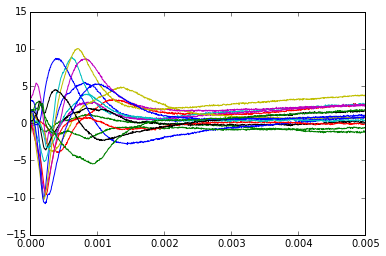

In [195]:
depol_6070_array = np.empty((len(spec6070),1000))
depol_6080_array = np.empty((len(spec6080),1000))
depol_7080_array = np.empty((len(spec7080),1000))
stim_names = ['Short Square - Hold -60mV','Short Square - Hold -70mV','Short Square - Hold -80mV']
for j in range(len(spec6070)):
    depol_sweep = lowest_possible_amplitude(spec6070[j],stim_names[0])
    hyper_sweep = lowest_possible_amplitude(spec6070[j],stim_names[1])
    data_set = ctc.get_ephys_data(spec6070[j])
    g = h5py.File(data_set.file_name,'r')
    spike_times1 = g['analysis']['aibs_spike_times']['Sweep_%d' % depol_sweep].value
    spike_times2 = g['analysis']['aibs_spike_times']['Sweep_%d' % hyper_sweep].value
    g.close()
    time_window = 0.005
    sweep_data1 = data_set.get_sweep(depol_sweep)
    sampling_rate = sweep_data1["sampling_rate"] # in Hz
    v1 = np.copy(sweep_data1["response"]) # in V
    v1 *= 1e3 # to mV
    v1=v1[int(spike_times1[0]*sampling_rate):int((spike_times1[0]+time_window)*sampling_rate)]
    v1=v1[:999]
    sweep_data2 = data_set.get_sweep(hyper_sweep)
    
    v2 = np.copy(sweep_data2["response"]) # in V
    v2 *= 1e3 # to mV
    v2=v2[spike_times2[0]*sampling_rate:(spike_times2[0]+time_window)*sampling_rate]
    v2=v2[:999]
    t = np.arange(0, len(v2)) * (1.0 / sampling_rate)
    v=v1-v2
    plt.plot(t,v)

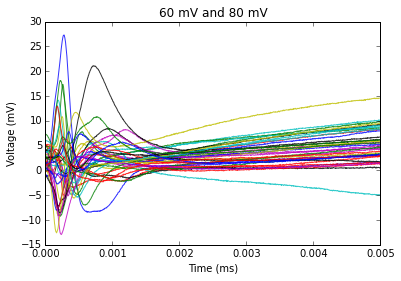

In [208]:
for j in range(len(spec6080)):
    depol_sweep = lowest_possible_amplitude(spec6080[j],stim_names[0])
    hyper_sweep = lowest_possible_amplitude(spec6080[j],stim_names[2])
    data_set = ctc.get_ephys_data(spec6080[j])
    g = h5py.File(data_set.file_name,'r')
    spike_times1 = g['analysis']['aibs_spike_times']['Sweep_%d' % depol_sweep].value
    spike_times2 = g['analysis']['aibs_spike_times']['Sweep_%d' % hyper_sweep].value
    g.close()
    time_window = 0.005
    sweep_data1 = data_set.get_sweep(depol_sweep)
    sampling_rate = sweep_data1["sampling_rate"] # in Hz
    v1 = np.copy(sweep_data1["response"]) # in V
    v1 *= 1e3 # to mV
    v1=v1[int(spike_times1[0]*sampling_rate):int((spike_times1[0]+time_window)*sampling_rate)]
    v1=v1[:999]
    sweep_data2 = data_set.get_sweep(hyper_sweep)
    
    v2 = np.copy(sweep_data2["response"]) # in V
    v2 *= 1e3 # to mV
    v2=v2[spike_times2[0]*sampling_rate:(spike_times2[0]+time_window)*sampling_rate]
    v2=v2[:999]
    t = np.arange(0, len(v2)) * (1.0 / sampling_rate)
    v=v1-v2
    plt.plot(t,v,alpha=.8)
plt.title('60 mV and 80 mV')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')

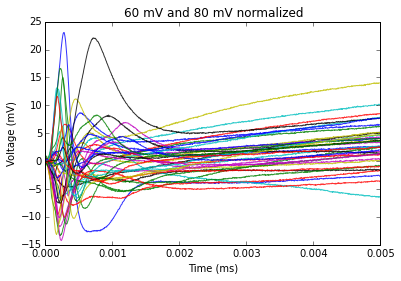

In [213]:
for j in range(len(spec6080)):
    depol_sweep = lowest_possible_amplitude(spec6080[j],stim_names[0])
    hyper_sweep = lowest_possible_amplitude(spec6080[j],stim_names[2])
    data_set = ctc.get_ephys_data(spec6080[j])
    g = h5py.File(data_set.file_name,'r')
    spike_times1 = g['analysis']['aibs_spike_times']['Sweep_%d' % depol_sweep].value
    spike_times2 = g['analysis']['aibs_spike_times']['Sweep_%d' % hyper_sweep].value
    g.close()
    time_window = 0.005
    sweep_data1 = data_set.get_sweep(depol_sweep)
    sampling_rate = sweep_data1["sampling_rate"] # in Hz
    v1 = np.copy(sweep_data1["response"]) # in V
    v1 *= 1e3 # to mV
    #v1[:] = [x +(-v1[spike_times1[0]]) for x in v1]
    v1=v1[int(spike_times1[0]*sampling_rate):int((spike_times1[0]+time_window)*sampling_rate)]
    v1=v1[:999]
    sweep_data2 = data_set.get_sweep(hyper_sweep)
    
    v2 = np.copy(sweep_data2["response"]) # in V
    v2 *= 1e3 # to mV
    #v2[:] = [x +(-v2[spike_times2[0]]) for x in v2]
    v2=v2[spike_times2[0]*sampling_rate:(spike_times2[0]+time_window)*sampling_rate]
    v2=v2[:999]
    t = np.arange(0, len(v2)) * (1.0 / sampling_rate)
    v=v1-v2
    v[:] = [x +(-v[0]) for x in v]
    plt.plot(t,v,alpha=.8)
plt.title('60 mV and 80 mV normalized')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')


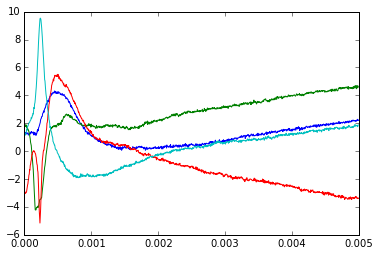

In [199]:
for j in range(len(spec7080)):
    depol_sweep = lowest_possible_amplitude(spec7080[j],stim_names[1])
    hyper_sweep = lowest_possible_amplitude(spec7080[j],stim_names[2])
    data_set = ctc.get_ephys_data(spec7080[j])
    g = h5py.File(data_set.file_name,'r')
    spike_times1 = g['analysis']['aibs_spike_times']['Sweep_%d' % depol_sweep].value
    spike_times2 = g['analysis']['aibs_spike_times']['Sweep_%d' % hyper_sweep].value
    g.close()
    time_window = 0.005
    sweep_data1 = data_set.get_sweep(depol_sweep)
    sampling_rate = sweep_data1["sampling_rate"] # in Hz
    v1 = np.copy(sweep_data1["response"]) # in V
    v1 *= 1e3 # to mV
    v1=v1[int(spike_times1[0]*sampling_rate):int((spike_times1[0]+time_window)*sampling_rate)]
    v1=v1[:999]
    sweep_data2 = data_set.get_sweep(hyper_sweep)
    
    v2 = np.copy(sweep_data2["response"]) # in V
    v2 *= 1e3 # to mV
    v2=v2[spike_times2[0]*sampling_rate:(spike_times2[0]+time_window)*sampling_rate]
    v2=v2[:999]
    t = np.arange(0, len(v2)) * (1.0 / sampling_rate)
    v=v1-v2
    plt.plot(t,v)

In [202]:
len(spec6080)

38